## SVM 雖比類神經快，但遇到大量的資料，運算效能還是不好
# 隨機森林：非線性分類，運算速度快

##  隨機森林可以想像成有很多的決策樹

In [9]:
from collections import Counter, defaultdict

In [4]:
s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]

d = collections.defaultdict(list)
for k, v in s:
    d[k].append(v)

list(d.items())


[('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])]

In [57]:
inputs = [
        ({'level':'Senior','lang':'Java','tweets':'no','phd':'no'},   False),
        ({'level':'Senior','lang':'Java','tweets':'no','phd':'yes'},  False),
        ({'level':'Mid','lang':'Python','tweets':'no','phd':'no'},     True),
        ({'level':'Junior','lang':'Python','tweets':'no','phd':'no'},  True),
        ({'level':'Junior','lang':'R','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'R','tweets':'yes','phd':'yes'},    False),
        ({'level':'Mid','lang':'R','tweets':'yes','phd':'yes'},        True),
        ({'level':'Senior','lang':'Python','tweets':'no','phd':'no'}, False),
        ({'level':'Senior','lang':'R','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'Python','tweets':'yes','phd':'no'}, True),
        ({'level':'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
        ({'level':'Mid','lang':'Python','tweets':'no','phd':'yes'},    True),
        ({'level':'Mid','lang':'Java','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'Python','tweets':'no','phd':'yes'},False)
    ]

In [86]:
def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

def class_probabilities(labels):
    total_count = len(labels)
    print(total_count)
    return [count / total_count
            for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    print(labels)
    print('====================')
    
    probabilities = class_probabilities(labels)
    print(probabilities)
    return entropy(probabilities)

def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)
    for s in subsets:
        print(s)
    print('====================')
    return sum( data_entropy(subset) * len(subset) / total_count
                for subset in subsets )

def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups

def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
#     print(attribute)
    return group_by(inputs, lambda x: x[0][attribute])

def partition_entropy_by(inputs,attribute):
    """computes the entropy corresponding to the given partition"""
    partitions = partition_by(inputs, attribute)
#     print(partitions.values())
    return partition_entropy(partitions.values())



In [87]:
for key in ['level','lang','tweets','phd']:
    print(key)
    print(key, partition_entropy_by(inputs, key))

level
[({'lang': 'Java', 'tweets': 'no', 'phd': 'no', 'level': 'Senior'}, False), ({'lang': 'Java', 'tweets': 'no', 'phd': 'yes', 'level': 'Senior'}, False), ({'lang': 'Python', 'tweets': 'no', 'phd': 'no', 'level': 'Senior'}, False), ({'lang': 'R', 'tweets': 'yes', 'phd': 'no', 'level': 'Senior'}, True), ({'lang': 'Python', 'tweets': 'yes', 'phd': 'yes', 'level': 'Senior'}, True)]
[({'lang': 'Python', 'tweets': 'no', 'phd': 'no', 'level': 'Mid'}, True), ({'lang': 'R', 'tweets': 'yes', 'phd': 'yes', 'level': 'Mid'}, True), ({'lang': 'Python', 'tweets': 'no', 'phd': 'yes', 'level': 'Mid'}, True), ({'lang': 'Java', 'tweets': 'yes', 'phd': 'no', 'level': 'Mid'}, True)]
[({'lang': 'Python', 'tweets': 'no', 'phd': 'no', 'level': 'Junior'}, True), ({'lang': 'R', 'tweets': 'yes', 'phd': 'no', 'level': 'Junior'}, True), ({'lang': 'R', 'tweets': 'yes', 'phd': 'yes', 'level': 'Junior'}, False), ({'lang': 'Python', 'tweets': 'yes', 'phd': 'no', 'level': 'Junior'}, True), ({'lang': 'Python', 'twee

In [60]:
senior_inputs = [(input, label) for input, label in inputs if input["level"] == "Senior"]
for key in ['lang', 'tweets', 'phd']:
    print(key, partition_entropy_by(senior_inputs, key))

('lang', 0.0)
('tweets', 0.0)
('phd', 0)


In [54]:
import math, random
groups = defaultdict(list)
for j in inputs:
    key = j[0]['level']
        
    groups[key].append(j)
print(groups)

subsets = groups.values()
print(a)

t = sum(len(s) for s in subsets)

print(t)
print('\n')

print('\n')
   
    
    
for s in subsets:
    print(s)
    print('\n')

    labels = [l for _, l in s]
    print(labels)
    print('\n')
    total_count = len(labels)
    ps = [ c/total_count for c in Counter(labels).values()]
    ans = sum(-p*math.log(p,2) for p in ps if p)
    print(ps)
    print('\n !!!!!!!')
    

defaultdict(<type 'list'>, {'Senior': [({'lang': 'Java', 'tweets': 'no', 'phd': 'no', 'level': 'Senior'}, False), ({'lang': 'Java', 'tweets': 'no', 'phd': 'yes', 'level': 'Senior'}, False), ({'lang': 'Python', 'tweets': 'no', 'phd': 'no', 'level': 'Senior'}, False), ({'lang': 'R', 'tweets': 'yes', 'phd': 'no', 'level': 'Senior'}, True), ({'lang': 'Python', 'tweets': 'yes', 'phd': 'yes', 'level': 'Senior'}, True)], 'Mid': [({'lang': 'Python', 'tweets': 'no', 'phd': 'no', 'level': 'Mid'}, True), ({'lang': 'R', 'tweets': 'yes', 'phd': 'yes', 'level': 'Mid'}, True), ({'lang': 'Python', 'tweets': 'no', 'phd': 'yes', 'level': 'Mid'}, True), ({'lang': 'Java', 'tweets': 'yes', 'phd': 'no', 'level': 'Mid'}, True)], 'Junior': [({'lang': 'Python', 'tweets': 'no', 'phd': 'no', 'level': 'Junior'}, True), ({'lang': 'R', 'tweets': 'yes', 'phd': 'no', 'level': 'Junior'}, True), ({'lang': 'R', 'tweets': 'yes', 'phd': 'yes', 'level': 'Junior'}, False), ({'lang': 'Python', 'tweets': 'yes', 'phd': 'no', '

In [7]:
def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups

def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
    return group_by(inputs, lambda x: x[0][attribute])

def partition_entropy_by(inputs,attribute):
    """computes the entropy corresponding to the given partition"""
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())


def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)

    return sum( data_entropy(subset) * len(subset) / total_count
                for subset in subsets )

In [50]:
import collections
s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]

d = collections.defaultdict(list)
for k, v in s:
    d[k].append(v)
    print(d)

list(d.items())

defaultdict(<type 'list'>, {'yellow': [1]})
defaultdict(<type 'list'>, {'blue': [2], 'yellow': [1]})
defaultdict(<type 'list'>, {'blue': [2], 'yellow': [1, 3]})
defaultdict(<type 'list'>, {'blue': [2, 4], 'yellow': [1, 3]})
defaultdict(<type 'list'>, {'blue': [2, 4], 'red': [1], 'yellow': [1, 3]})


[('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])]

In [51]:
d.values()

[[2, 4], [1], [1, 3]]

---

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
bc = datasets.load_breast_cancer()

In [4]:
bc.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [44]:
print(bc.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
x = pd.DataFrame(bc['data'], columns=bc['feature_names'])
print("target_names: "+str(bc['target_names']))
y = pd.DataFrame(bc['target'], columns=['target'])
bc_data = pd.concat([x,y], axis=1)
f = bc['feature_names'][:2]
# f = np.append(f,['target'],axis=0)

bc_data = bc_data[['mean radius','mean perimeter','target']]

# bc_data = bc_data[bc_data['target'].isin([0,1])]
# bc_data.head(3)

target_names: ['malignant' 'benign']


In [6]:
# bc_data = bc_data[f]
bc_data = bc_data[bc_data['target'].isin([0,1])]
bc_data.head(10)

,mean radius,mean perimeter,target
0,17.99,122.80,0
1,20.57,132.90,0
2,19.69,130.00,0
3,11.42,77.58,0
4,20.29,135.10,0
5,12.45,82.57,0
6,18.25,119.60,0
7,13.71,90.20,0
8,13.00,87.50,0
9,12.46,83.97,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    bc_data[['mean radius','mean perimeter']], bc_data[['target']], test_size=0.3, random_state=0)

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=6,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [24]:
tree.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [25]:
y_test['target'].values

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [26]:
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['target'].values[i]:
        print(i,v)
        error+=1
print(error)

(0, 1)
(13, 0)
(20, 1)
(32, 0)
(33, 1)
(35, 1)
(39, 1)
(40, 1)
(44, 0)
(49, 1)
(73, 1)
(103, 0)
(113, 0)
(116, 0)
(119, 0)
(122, 1)
(133, 0)
(137, 1)
(155, 1)
(166, 1)
(169, 0)
21


In [27]:
tree.score(X_test,y_test['target'])

0.8771929824561403

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

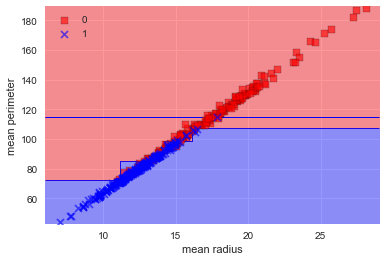

In [29]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel(bc['feature_names'][0])
plt.ylabel(bc['feature_names'][2])
plt.legend(loc='upper left')
# plt.tight_layout()
plt.show()

In [30]:
from sklearn.tree import export_graphviz

In [31]:
export_graphviz(tree, out_file='tree.dot', feature_names=['mean radius','mean perimeter'])

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [85]:
tree.score(X_test,y_test['target'])

0.88304093567251463

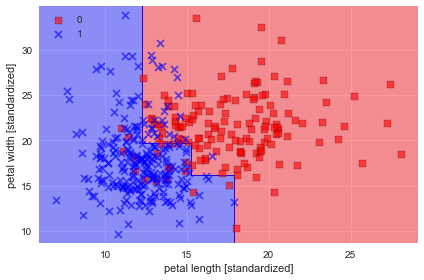

In [84]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()